In [14]:
from cProfile import label
from unittest import result
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from UNet_Fourier_Facilities import UNet_Label_Gen, Fourier_Images
from skimage.io import imread
import os
import tensorflow as tf

In [2]:
TRAIN_FILMED_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\water\\filmed"
TRAIN_CLEAN_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\water\\clean_aligned"

train_filmed_imgs = []
train_clean_imgs = []

OFFSET = 400
IMG_WIDTH = 128
IMG_HEIGHT = 128

for addr_filmed in os.listdir(TRAIN_FILMED_PATH):
    img = plt.imread(f"{TRAIN_FILMED_PATH}\{addr_filmed}")
    train_filmed_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])

for addr_clean in os.listdir(TRAIN_CLEAN_PATH):
    img = plt.imread(f"{TRAIN_CLEAN_PATH}\{addr_clean}")
    train_clean_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])


[[0.04313726 0.03529412 0.23529412 ... 0.03921569 0.11372549 0.07843138]
 [0.10980392 0.03921569 0.14901961 ... 0.04705882 0.10980392 0.07058824]
 [0.23137255 0.13333334 0.08627451 ... 0.00784314 0.00784314 0.02745098]
 ...
 [0.44313726 0.47058824 0.49411765 ... 0.05098039 0.03137255 0.01176471]
 [0.4862745  0.5019608  0.5137255  ... 0.01568628 0.00784314 0.00392157]
 [0.49803922 0.50980395 0.52156866 ... 0.01176471 0.01568628 0.00784314]]


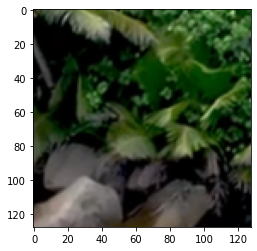

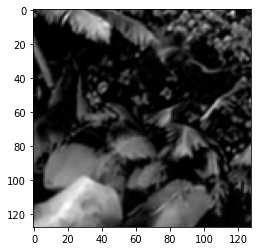

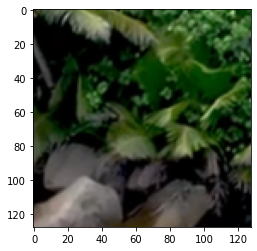

In [26]:
img = train_clean_imgs[0]


def split_RGB_2_Grayscale( img):
    img_r = img[:, :, 0]
    img_g = img[:, :, 1]
    img_b = img[:, :, 2]
    return (img_r, img_g, img_b)


img_r, img_g, img_b = split_RGB_2_Grayscale(img)

processed_rgb = tf.stack([img_r, img_g, img_b], axis=-1)
# processed_rgb = tf.reshape(processed_rgb, (128,128,3))

print(img_b)

plt.imshow(img)
plt.show()
plt.imshow(img_b, cmap="gray")
plt.show()
plt.imshow(processed_rgb)
plt.show()




In [4]:
for img_filmed, img_aligned in zip(train_filmed_imgs, train_clean_imgs):

    print(" ################# NEUE RUNDE ###################")
    fourier_handler = Fourier_Images(img_filmed, img_aligned)

    _, _, mask = fourier_handler.generate_mask_from_images()
    processed_image = fourier_handler.replace_masked_sections_and_return_resulting_img()


 
    plt.imshow(mask, cmap="gray")
    plt.show()
    plt.imshow(img_filmed)
    plt.show()
    plt.imshow(processed_image)
    plt.show()


 ################# NEUE RUNDE ###################


TypeError: generate_mask_from_images() missing 6 required positional arguments: 'img_filmed_complex_r', 'img_filmed_complex_g', 'img_filmed_complex_b', 'img_clean_complex_r', 'img_clean_complex_g', and 'img_clean_complex_b'